In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

In [4]:
imagem = cv2.imread("../imagens/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

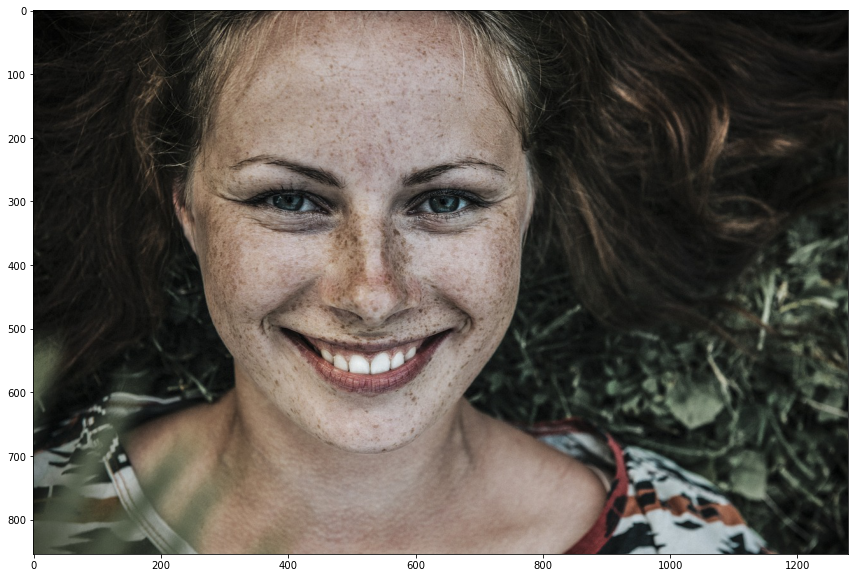

In [5]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)

In [6]:
classificador_dlib_68_path = "../classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [9]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    return imagem

In [10]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


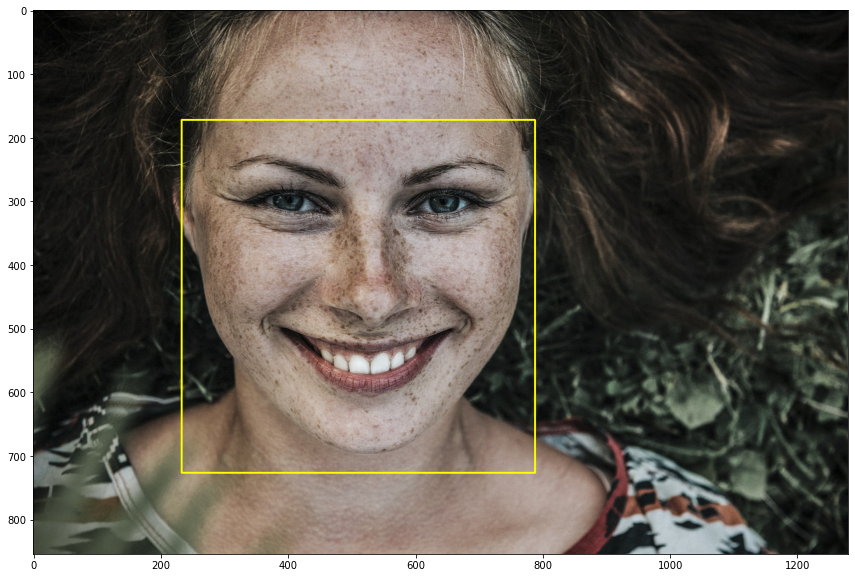

In [11]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_anotada)

DLIB USES HOG, HISTOGRAM OF ORIENTED GRADIENT => dlib.net

In [14]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, ret).parts()]))
    
    return marcos

In [15]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [16]:
len(marcos_faciais)

1

In [17]:
len(marcos_faciais[0])

68

In [22]:
def anotar_marcos_faciais(imagem, marcos):
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0, 0], ponto[0, 1])
            cv2.circle(imagem, centro, 3, (255, 255, 0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    return imagem

In [23]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

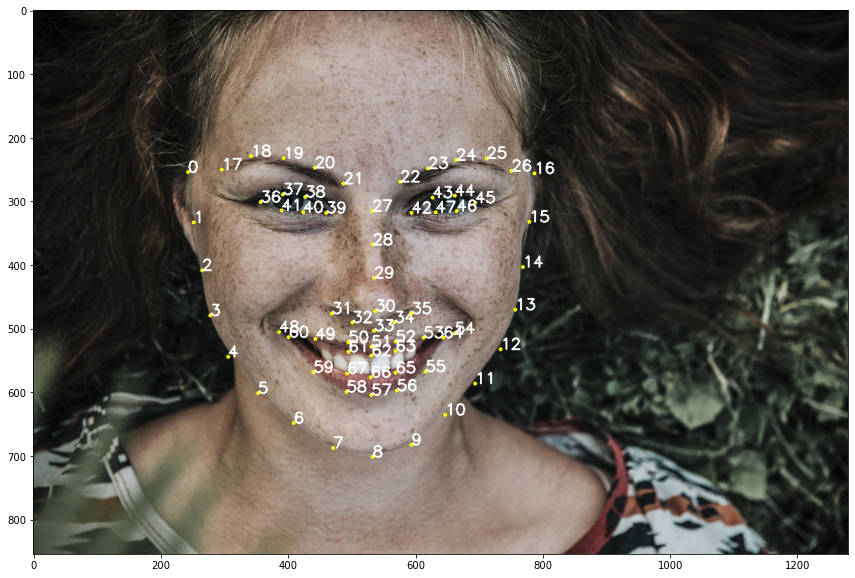

In [24]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_anotada)

In [25]:
imagem_pessoa = cv2.imread("../imagens/px-man-happy.jpg")
imagem_pessoa = cv2.cvtColor(imagem_pessoa, cv2.COLOR_BGR2RGB)

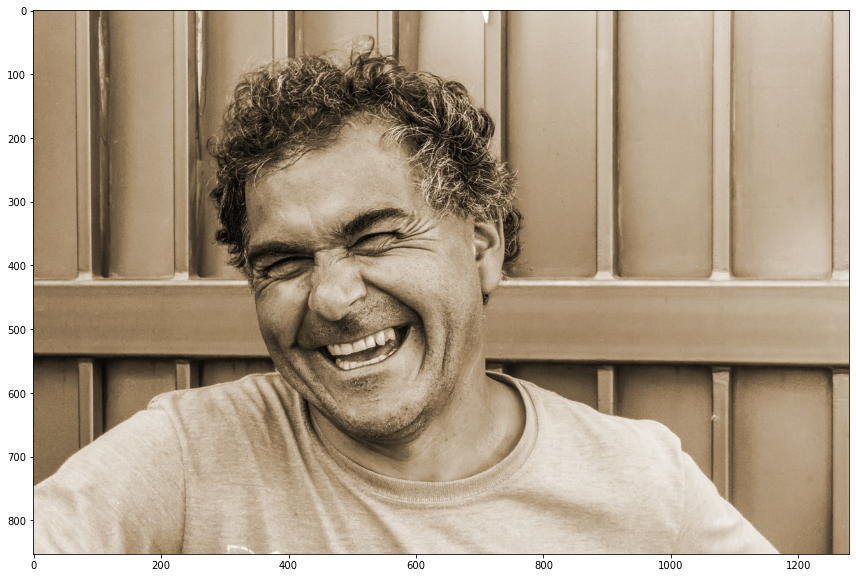

In [26]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_pessoa)

In [27]:
imagem_anotada = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada)
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

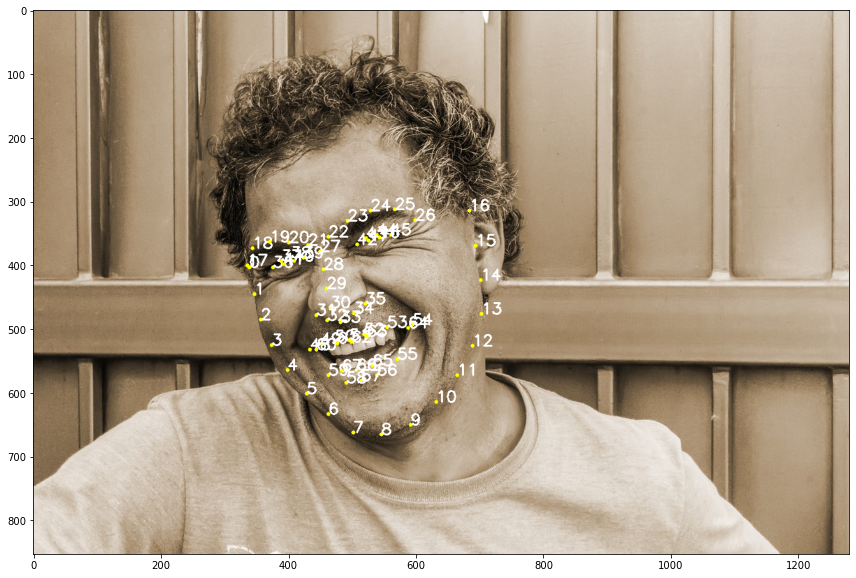

In [28]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_anotada)